# <b>DSAI 3201 Machine Learning Project<b>

## Data Understanding and Preprocessing

## <b>1. Dataset Exploration<b> 

Examine the structure and features of the
UCI Indoor Localization WiFi Dataset (520 RSSI features, along
with building, floor, and coordinate information).

In [1]:
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datset
train_df = pd.read_csv('trainingData.csv')
test_df = pd.read_csv('validationData.csv')

# Display the first few rows of the dataset
print("Training dataset: ")
print(train_df.head())

print("\nTest dataset: ")
print(test_df.head())


Training dataset: 
   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0     100     100     100     100     100     100     100     100     100   
1     100     100     100     100     100     100     100     100     100   
2     100     100     100     100     100     100     100     -97     100   
3     100     100     100     100     100     100     100     100     100   
4     100     100     100     100     100     100     100     100     100   

   WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   
4     100  ...     100 -7632.1436  4.864982e+06      0           0      122   

   RELATIVEPOSITION  USERID  PHONEID   TIME

In [3]:
# Display the dataset's structure and basic information
print("\nTrain Dataset Info:")
train_df.info()

print("\nTest Dataset Info:")
test_df.info()



Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 4.5 MB


In [4]:
last_9_columns = train_df.iloc[:, -9:]

# Apply the describe function on the last 9 columns
print(last_9_columns.describe())

# Show summary statistics of the dataset
print("\n-------Train Summary Statistics-------")
print(train_df.describe())
print("\n-------Test Summary Statistics-------")
print(test_df.describe())



          LONGITUDE      LATITUDE         FLOOR    BUILDINGID       SPACEID  \
count  19937.000000  1.993700e+04  19937.000000  19937.000000  19937.000000   
mean   -7464.275947  4.864871e+06      1.674575      1.212820    148.429954   
std      123.402010  6.693318e+01      1.223078      0.833139     58.342106   
min    -7691.338400  4.864746e+06      0.000000      0.000000      1.000000   
25%    -7594.737000  4.864821e+06      1.000000      0.000000    110.000000   
50%    -7423.060900  4.864852e+06      2.000000      1.000000    129.000000   
75%    -7359.193000  4.864930e+06      3.000000      2.000000    207.000000   
max    -7300.818990  4.865017e+06      4.000000      2.000000    254.000000   

       RELATIVEPOSITION        USERID       PHONEID     TIMESTAMP  
count      19937.000000  19937.000000  19937.000000  1.993700e+04  
mean           1.833024      9.068014     13.021869  1.371421e+09  
std            0.372964      4.988720      5.362410  5.572054e+05  
min            1

In [5]:
#drop unnecessary columns in both training and testing datasets  
dropped_columns = ["SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"]

train_df = train_df.drop(columns= dropped_columns)
test_df = test_df.drop(columns=dropped_columns)



In [6]:
# Check the column names to understand the features
print("\nColumns in Train Dataset:")
print(train_df.columns)
print("\nColumns in Test Dataset:")
print(test_df.columns)



Columns in Train Dataset:
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'LONGITUDE',
       'LATITUDE', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=524)

Columns in Test Dataset:
Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP515', 'WAP516', 'WAP517', 'WAP518', 'WAP519', 'WAP520', 'LONGITUDE',
       'LATITUDE', 'FLOOR', 'BUILDINGID'],
      dtype='object', length=524)


## <b>2. Data Cleaning and Preparation:<b>

- Handle any missing values and normalize the RSSI
measurements

In [7]:
# checking data types
# print(train_df.dtypes)

# Check for missing values
print("\n-------Train Missing Values-------")
print(train_df.isnull().sum())

print("\n-------Test Missing Values-------")
print(test_df.isnull().sum())

# Filling missing values with the mean
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)



-------Train Missing Values-------
WAP001        0
WAP002        0
WAP003        0
WAP004        0
WAP005        0
             ..
WAP520        0
LONGITUDE     0
LATITUDE      0
FLOOR         0
BUILDINGID    0
Length: 524, dtype: int64

-------Test Missing Values-------
WAP001        0
WAP002        0
WAP003        0
WAP004        0
WAP005        0
             ..
WAP520        0
LONGITUDE     0
LATITUDE      0
FLOOR         0
BUILDINGID    0
Length: 524, dtype: int64


there are no missing values in this dataset, so we move on to checking the validity of all access points:


In [8]:

#access points with unique value being only 100 = the access point is not detected

print ("checking if all access points are detected (training data)")
count= 0
break_point = 0

for i in train_df:
    print(f"{i} unique values: {train_df[i].unique()}\n\n ")
    if train_df[i].unique().shape == (1,):
        count += 1
    break_point += 1
    if break_point >= 10:
        break
    
print(f"{count}  access points are undetected")

        

checking if all access points are detected (training data)
WAP001 unique values: [100 -97 -95 -96 -94 -93]

 
WAP002 unique values: [100 -90 -86]

 
WAP003 unique values: [100]

 
WAP004 unique values: [100]

 
WAP005 unique values: [100 -92 -96 -97 -95 -93 -90 -89 -91 -94]

 
WAP006 unique values: [100 -94 -90 -89 -79 -87 -68 -71 -67 -81 -95 -93 -83 -78 -85 -86 -91 -92
 -62 -65 -80 -82 -96 -70 -88 -72 -84 -58 -76 -66 -60 -77 -74 -61 -98 -97]

 
WAP007 unique values: [100 -84 -80 -82 -93 -75 -86 -88 -69 -73 -74 -67 -60 -62 -54 -72 -76 -61
 -65 -49 -83 -92 -71 -78 -81 -77 -79 -90 -85 -95 -94 -89 -96 -97 -87 -68
 -56 -59 -55 -98 -91 -63 -51 -57 -58 -53 -70 -66 -48 -99 -47 -64]

 
WAP008 unique values: [100 -97 -83 -90 -95 -84 -98 -91 -80 -92 -86 -81 -94 -88 -85 -96 -87 -89
 -72 -79 -82 -65 -66 -69 -77 -73 -70 -78 -68 -93 -71 -67 -74 -63 -62 -75
 -76 -61 -64]

 
WAP009 unique values: [100 -70 -83 -86 -68 -85 -73 -66 -62 -94 -87 -98 -88 -76 -71 -77 -63 -74
 -79 -93 -96 -90 -69 -56 -67 -82 

In [9]:

print ("checking if all access points are detected (testing data)")
count= 0
break_point = 0

for i in test_df:
    print(f"{i} unique values: {test_df[i].unique()}\n\n ")
    if test_df[i].unique().shape == (1,):
        count += 1
    break_point += 1
    if break_point >= 10:
        break
    
print(f"{count}  access points are undetected")



        

checking if all access points are detected (testing data)
WAP001 unique values: [100 -94 -93 -92 -85]

 
WAP002 unique values: [100]

 
WAP003 unique values: [100 -85 -87]

 
WAP004 unique values: [100 -84 -88]

 
WAP005 unique values: [100]

 
WAP006 unique values: [100]

 
WAP007 unique values: [100]

 
WAP008 unique values: [100 -99 -92 -94 -95 -87 -85 -88 -79 -83 -62 -64 -90 -89 -91 -81 -82 -75]

 
WAP009 unique values: [100 -79 -84 -61 -75 -96 -87 -78 -93 -67 -89 -95 -88 -92 -81 -94 -69 -82
 -71 -80 -70 -62 -85 -73 -83 -59 -76]

 
WAP010 unique values: [100 -88 -98 -84 -90]

 
4  access points are undetected


- Scale features appropriately and encode any categorical
variables if needed (we decided to use normalization for this)

In [10]:
# normalizing x which is in the range [xmin, xmax] to a range [a,b]

def normalize(x, xmin, xmax, a, b):
    numerator = x - xmin
    denominator = xmax - xmin
    multiplier = b - a
    ans = (numerator/denominator)*multiplier + a
    return ans

In [11]:
no_sig = 100

#Normalization for RSSI values
sig_min = -104 
sig_max = 0
tar_min = 0.25
tar_max = 1.0

def normalize_wifi(num):
    ans = 0
    num = float(num)
    if math.isclose(num, no_sig, rel_tol=1e-3):  #If the RSSI value = no_signal ==> the value after normalized is 0
        return 0
    else:
        ans = normalize(num, sig_min, sig_max, tar_min, tar_max)
        return ans
    
#Normalization for Latitude  
lat_min = 4864745
lat_max = 4865016
tarmin = 0
tarmax = 1
def normalize_lat(num):
    num = float(num)
    ans = normalize(num, lat_min, lat_max, tarmin, tarmax)
    return ans

#Normalization for Longtitude
long_min = -7691.338 
long_max = -7300.819
tarmin = 0
tarmax = 1
def normalize_long(num):
    num = float(num)
    ans = normalize(num, long_min, long_max, tarmin, tarmax)
    return ans


In [12]:


# apply normalization for latitude and longitude in testing and training data
train_df["LATITUDE"] = train_df["LATITUDE"].apply(normalize_lat)
train_df["LONGITUDE"] = train_df["LONGITUDE"].apply(normalize_long)

test_df["LATITUDE"] = test_df["LATITUDE"].apply(normalize_lat)
test_df["LONGITUDE"] = test_df["LONGITUDE"].apply(normalize_long)


# Normalize RSSI values 
wifi_cells_ta=train_df.columns[:520] # 520 wifi signals, index started at 1
wifi_cells_te=test_df.columns[:520]

for i in wifi_cells_ta:
    train_df[i] = train_df[i].apply(normalize_wifi)
    
for i in wifi_cells_te:
    test_df[i] = test_df[i].apply(normalize_wifi)
    
train_df


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.384293,0.648628,2,1
1,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.396183,0.698248,2,1
2,0.0,0.0,0,0,0.0,0.0,0.0,0.300481,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.440915,0.754731,2,1
3,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.427041,0.697760,2,1
4,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.151579,0.875340,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.527169,0.478658,3,1
19933,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.770046,0.335999,1,2
19934,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.446832,0.532439,3,1
19935,0.0,0.0,0,0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.394388,0.556368,3,1



## Visualization ##

In [13]:
#merge both dfs for visualization purposes only 
df = pd.concat([test_df, train_df], axis=0)
df= df.fillna(0)
df

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.449200,0.533812,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.787339,0.349595,4,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.811832,0.374663,4,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.833540,0.360994,4,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.127622,0.654610,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.527169,0.478658,3,1
19933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.770046,0.335999,1,2
19934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.446832,0.532439,3,1
19935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.394388,0.556368,3,1


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


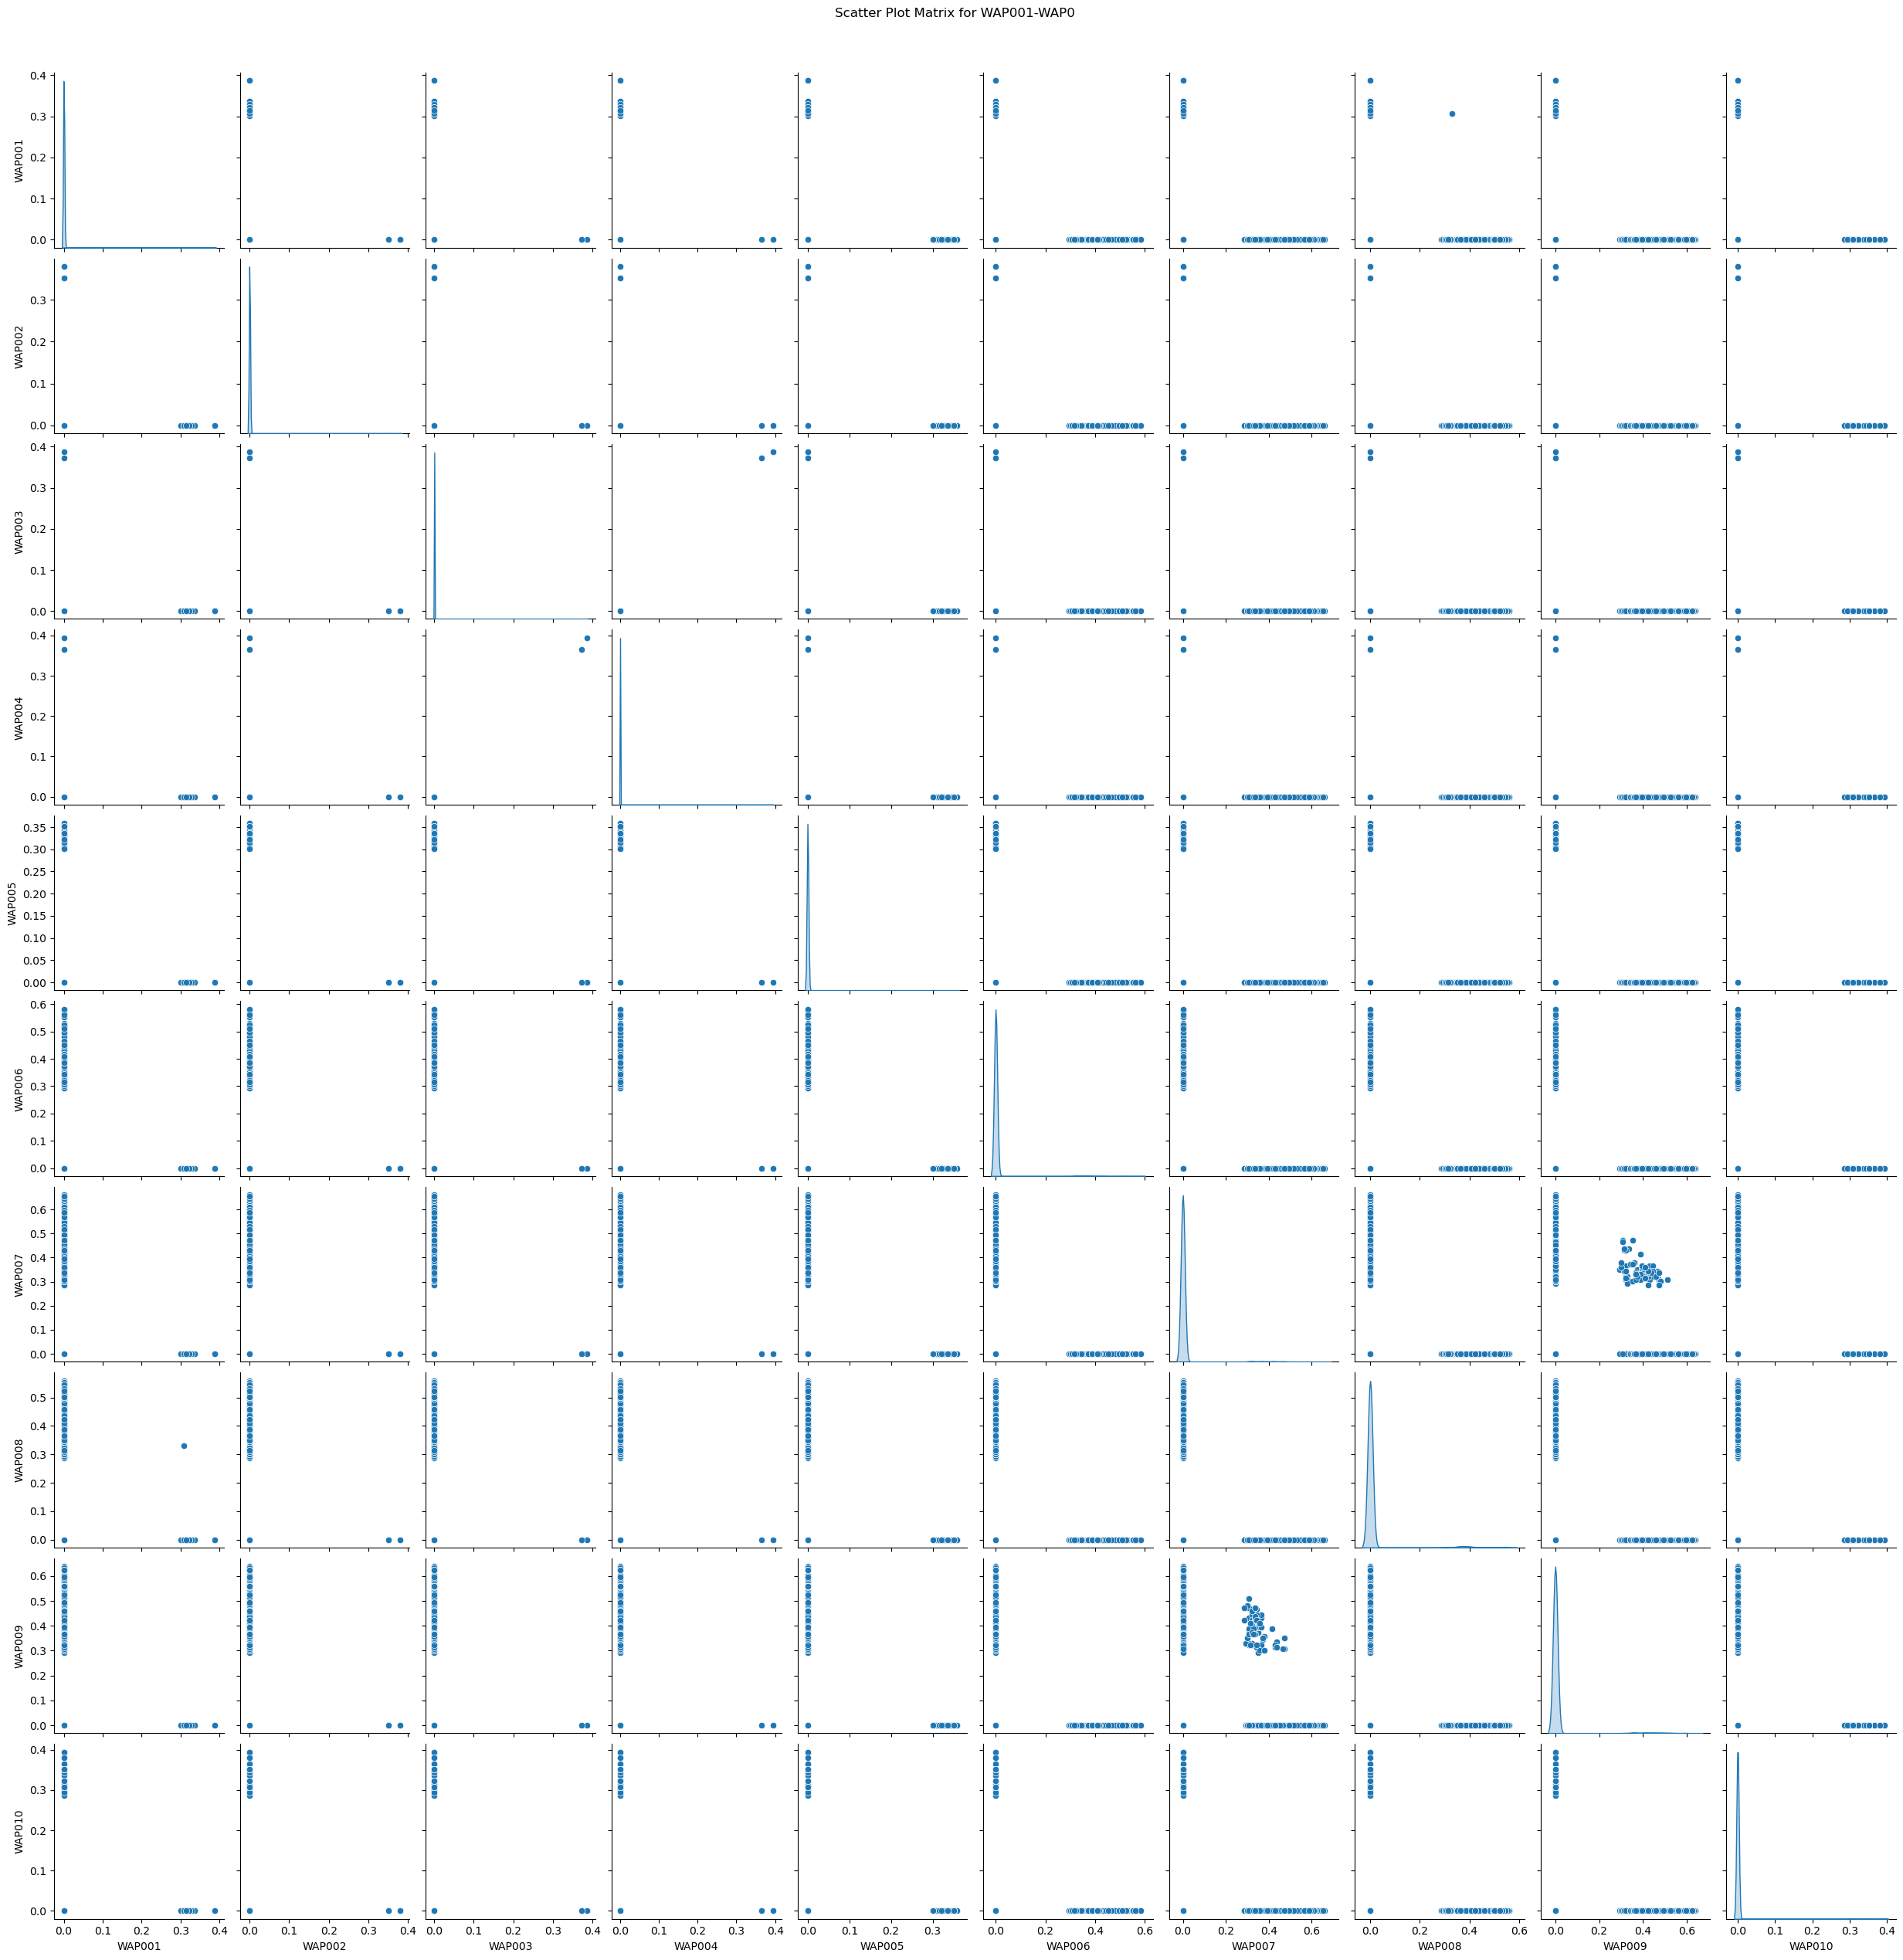

In [14]:
sns.pairplot(df.iloc[:, :10], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for WAP001-WAP0', y=1.02)
plt.show()

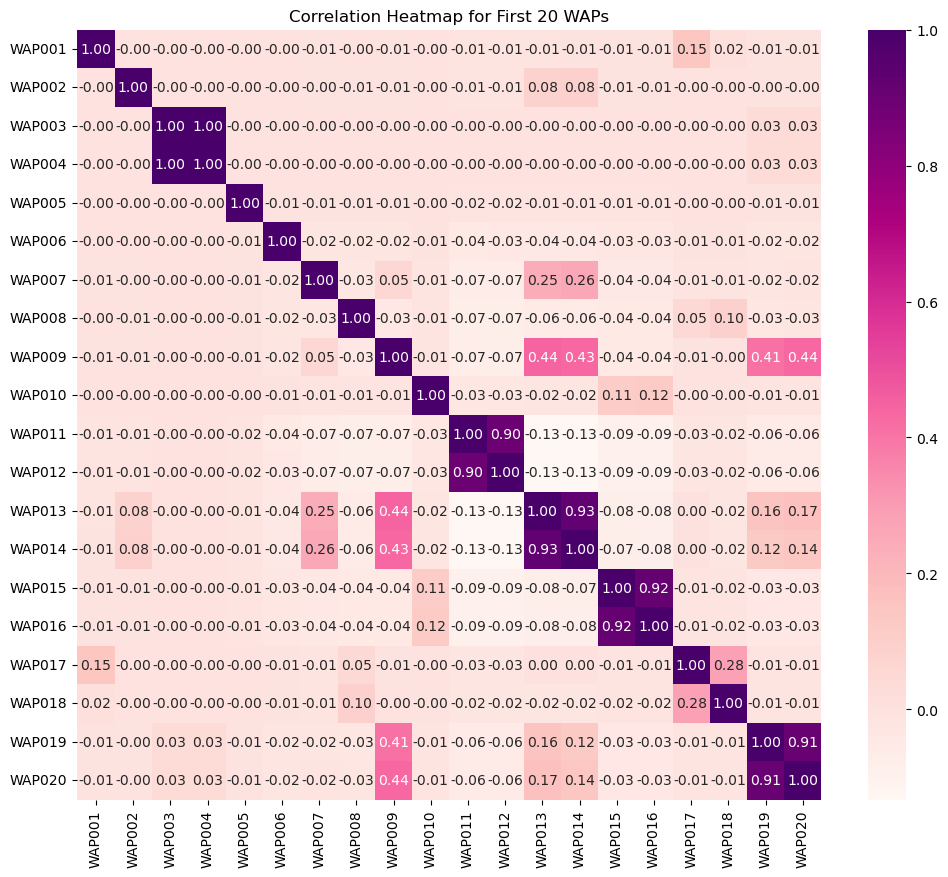

In [15]:
wap_subset = df.iloc[:, :20]  # First 20 WAPs
plt.figure(figsize=(12, 10))
sns.heatmap(wap_subset.corr(), cmap='RdPu', annot=True, fmt='.2f')
plt.title('Correlation Heatmap for First 20 WAPs')
plt.show()

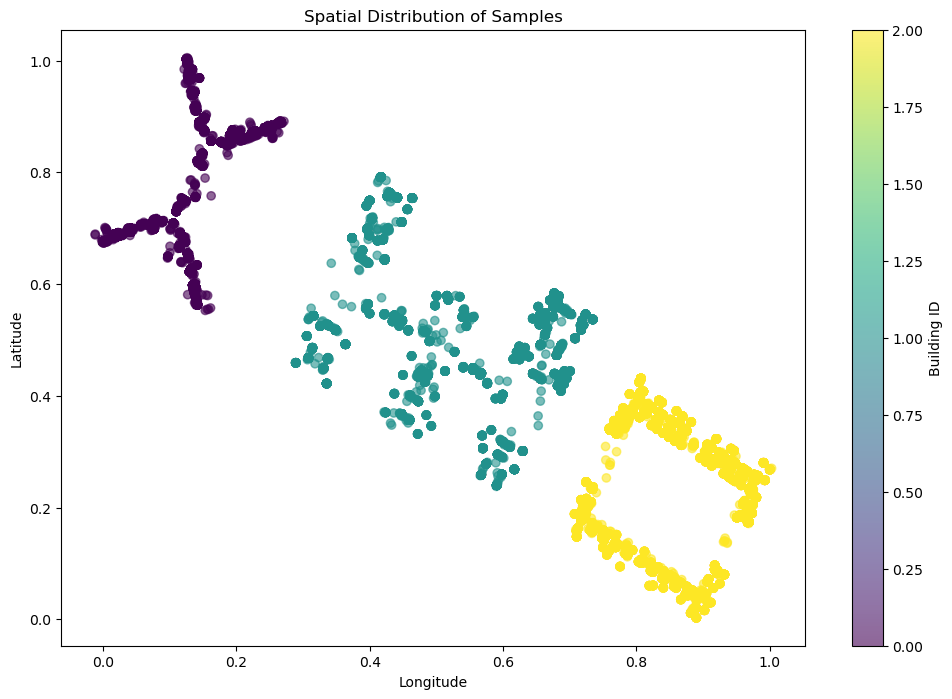

In [16]:
# Scatter plot of LONGITUDE vs LATITUDE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['BUILDINGID'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Building ID')
plt.title('Spatial Distribution of Samples')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()